In [94]:
from IPython.display import Image

In [95]:
#!pip install prettytable 

In [96]:
from prettytable import PrettyTable

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Settings

- `STATES S` - The different states as per the question is as follows:

    - S0
    - S1
    - S2
    - S3

    - Here , S3 is an absorbant state with a utility/value value of 10.

- `ACTIONS A` - The different supported actions are as follows:

    - move left (l)
        - Here the agent moves left with a probability of 0.8 and right with a probability of 0.2

    - move right (r)
        - Here the agent moves left with a probability of 0.2 and right with a probability of 0.8

#### TRANSITION FUNGTIONP
Using the description of the actions, the following transition function can be designed. Here, each box represents $P\left(s^{\prime} \mid s, a\right)$, i.e. probability of reaching a state s' given action a from an initial state s
For action I,



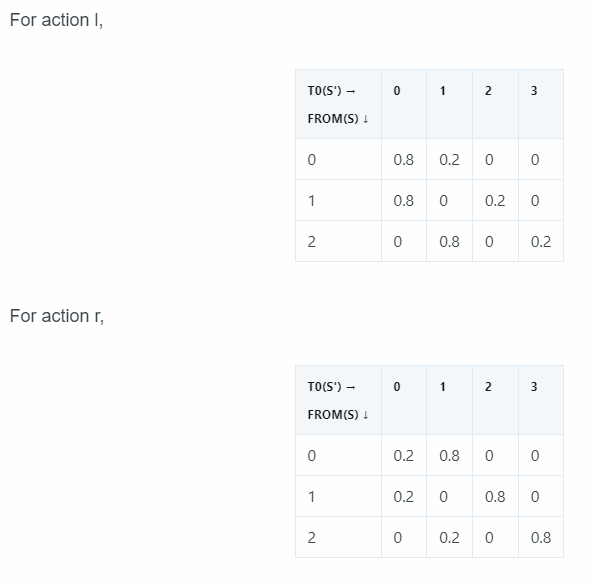

In [97]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\DP-vi-03.PNG', width=400)

#### REWARD FUNCTION
The cost or reward of taking action a in state s, R(s , a) = -1, for all the states and actions. (except state 3, which is the absorbant state)

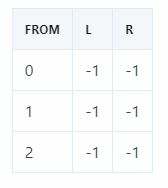

In [99]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\DP-vi-04.PNG', width=200)

#### DISCOUNT FACTOR
The discount factor, γ = 0.25
This efficiently reduces the utility values with each time step, thus ensuring that the model converges faster.

#### the GRID

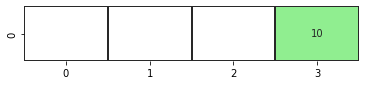

In [107]:
BOARD_ROWS = 1
BOARD_COLS = 4

nbr_cells  = BOARD_ROWS * BOARD_COLS

GOAL_STATES   = [nbr_cells-1]
GOAL_STATES_V = [10]

colors = []

for i in range(nbr_cells):
    if i in GOAL_STATES:
        colors.append("lightgreen")
    else:
        colors.append("white")
        
plt.figure(figsize=(6, BOARD_ROWS))

formatted_text = [''] * nbr_cells

i = 0
for goal_state in GOAL_STATES:
    formatted_text[goal_state] = str(GOAL_STATES_V[i])
    i+=1

sns.heatmap(np.array(range(nbr_cells)).reshape(BOARD_ROWS, BOARD_COLS), 
                     cmap  = colors, 
                     fmt="",
                     annot = np.array(formatted_text).reshape(BOARD_ROWS, BOARD_COLS), 
                     linecolor  = "#282828", 
                     linewidths = 0.1,
                     cbar  = False);

In [106]:
np.array(formatted_text).reshape(1, 4)

array([['', '', '', '10']], dtype='<U2')

In [33]:
nbr_states  = 4
actions     = ['L', 'R']
nbr_actions = 2

#### Rewards [from a state][L R]

In [34]:
R = [
     [-1, -1], 
     [-1, -1], 
     [-1, -1]
    ]

#### transistion probability P [from state] [to state] [action]

In [108]:
P = [
        [
            [0.8, 0.2], [0.2, 0.8], [0, 0],     [0, 0]
        ],
        [
            [0.8, 0.2], [0,   0],   [0.2, 0.8], [0, 0]
        ],
        [
            [0,   0],   [0.8, 0.2], [0, 0],     [0.2, 0.8]
        ],
]

In [110]:
convgence_delta = 0.001
discount_factor = 0.25

max_diff_value_fn = 0

#    s0 s1 s2 s3
V = [0, 0, 0, 10]  # value function of each state

In [111]:
# table for storing the iteration results
# Specify the Column Names while initializing the Table
iter_results = PrettyTable(["Time", "State 0", "State 1", "State 2", "State 3", "Max Diff"])

In [112]:
# loop for a certain number of iterations
for time in range(0, 30):
    
    # save the iter results
    iter_results.add_row([time, V[0], V[1], V[2], V[3], max_diff])
   
    Vnew = [-1e9, -1e9, -1e9, 10]
    
    # for all states [0 1 2] <- from_state
    for from_state in range(3):
        
        # for all actions [L R]
        for a in range(nbr_actions):
            cur_state_act_val_fn = 0
            
             # for all states [0 1 2] <- to_state
            for to_state in range(nbr_states): 
                
                # get the transistion probabilities from_state, action, to_state
                cur_state_act_val_fn += P[from_state][to_state][a] * V[to_state]
                
            cur_state_act_val_fn *= discount_factor
            cur_state_act_val_fn += R[from_state][a]
            
            Vnew[from_state] = max(Vnew[from_state], cur_state_act_val_fn)
            
    max_diff_value_fn = 0
    
    for i in range(4):
        max_diff_value_fn = max(max_diff_value_fn, abs(V[from_state] - Vnew[from_state]))
        
    V = Vnew
    
    if(max_diff_value_fn < convgence_delta):
        break

In [113]:
iter_results.align = 'r'
print(iter_results)

+------+-----------+-----------+----------+---------+-----------------------+
| Time |   State 0 |   State 1 |  State 2 | State 3 |              Max Diff |
+------+-----------+-----------+----------+---------+-----------------------+
|    0 |         0 |         0 |        0 |      10 | 0.0004062499999999414 |
|    1 |      -1.0 |      -1.0 |      1.0 |      10 | 0.0004062499999999414 |
|    2 |     -1.25 |     -0.85 |     0.95 |      10 | 0.0004062499999999414 |
|    3 |   -1.2325 |   -0.8725 |   0.9575 |      10 | 0.0004062499999999414 |
|    4 | -1.236125 | -0.870125 | 0.956375 |      10 | 0.0004062499999999414 |
+------+-----------+-----------+----------+---------+-----------------------+


In [115]:
# one final iteration to determine the policy
Vnew = [-1e9, -1e9, -1e9, 10]
policy = ['NA', 'NA', 'NA', 'NA']
for i in range(3):
    for a in range(nbr_actions):
        cur_val = 0
        for j in range(nbr_states):
            cur_val += P[i][j][a]*V[j]
        cur_val *= gamma
        cur_val += R[i][a]
        if(Vnew[i] < cur_val):
            policy[i] = actions[a]
            Vnew[i] = max(Vnew[i], cur_val)
print("The policy is:", policy)

The policy is: ['R', 'R', 'R', 'NA']
